In [1]:
# kmean 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('socials.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
def km(X,K, iter = 1000 ) :
    cent = np.random.choice(range(len(X)) , K, replace = False )
    centroids = X.iloc[cent]
    for i in range(iter) :
        dist = np.linalg.norm(X.values[:,np.newaxis] - centroids.values , axis =2)
        label = np.argmin(dist,axis =1)
    new_c = np.array([X.iloc[label == k].mean(axis=0) for k in range(K)])
    centroids = pd.DataFrame(new_c , columns = X.columns)
    return centroids , label

         Age  EstimatedSalary
0  18.500000     85500.000000
1  36.667857     51960.714286
2  40.322034    111669.491525


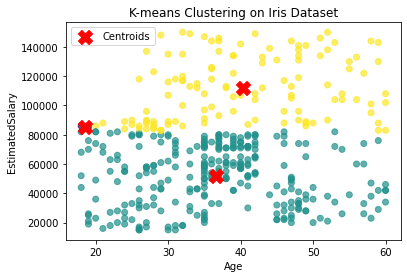

In [4]:
data = data.drop(['Purchased', 'User ID', 'Gender'], axis=1)
K = 3
centroids,labels = km(data, K)
df = data
plt.scatter(df['Age'], df['EstimatedSalary'], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids['Age'], centroids['EstimatedSalary'], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()